<a href="https://colab.research.google.com/github/Dominique-HL/predicciones_de_ventas/blob/main/Proyecto1_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte2

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?

In [4]:
df.shape
# Filas= 8523
# columnas = 12 

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [6]:
df.duplicated().sum()
# No hay duplicados con sum() me entrega la suma de los duplicados y es 0.

0

4) Identifiquen los valores faltantes

In [7]:
df.isna().sum()
# faltan 1463 datos en Item_Weight / Faltan 2410 en Outlet_Size 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [8]:
#Análisis  y llenado de la columna Item_Weight
df['Item_Weight'].value_counts()
df['Item_Weight'].mean()

12.857645184135976

In [9]:
#Revisar el promedio de los pesos , sin contar los NaN para poder utilizar en los espacios en blanco
Avg_weight =df ['Item_Weight'].mean(skipna = True )
print(Avg_weight)

12.857645184135976


In [10]:
#Reemplazar los valores NaN por el promedio de los pesos en columna Item_Weight 
df['Item_Weight'] = df['Item_Weight'].fillna(Avg_weight)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Análisis de la columna Outlet_Size 
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
#conocer la cantidad de datos faltantes por size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
#Ya que puede ser relevante el tamaño de una tienda para futuras decisiones, y por el momento no se borrará
#y además se desconoce el área en metros sólo están los valores como "object" entonce se rellenarán las columnas como "Unknown".
df['Outlet_Size'].fillna('Unknown', inplace =True)

In [14]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

6) Confirmen que no hay valores faltantes después de abordarlos.

In [15]:
#Revisión al momento de los cambios, para revisar que no hay datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [16]:
# Se analiza visualmente y luego con value_counts si no hay inconsistencias en los items Dtype "object", existe en Item_Fat_Content 
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace =True)
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace =True)

In [19]:
df['Item_Fat_Content'].replace('reg',' Regular',inplace =True)

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat     5517
Regular     2889
 Regular     117
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Fat_Content'].replace('Regular',' Regular',inplace =True)
df['Item_Fat_Content'].value_counts()

Low Fat     5517
 Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
df['Item_Fat_Content'].replace(' Regular','Regular Fat',inplace =True)
df['Item_Fat_Content'].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64


8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [23]:
#Info estadística
df.head()
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Parte 3

  Histograma para ver las distribuciones de diversas características en el conjunto de datos

In [24]:
#importar bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [25]:
#load dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1.Histograma para ver las distribuciones de diversas características en el conjunto de datos.

<Axes: >

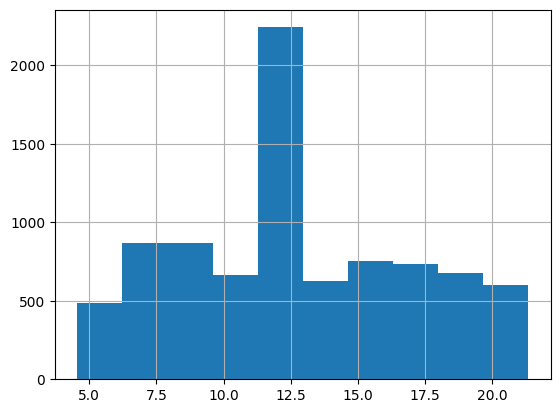

In [27]:
#Histograma Item_Weight
df['Item_Weight'].hist()

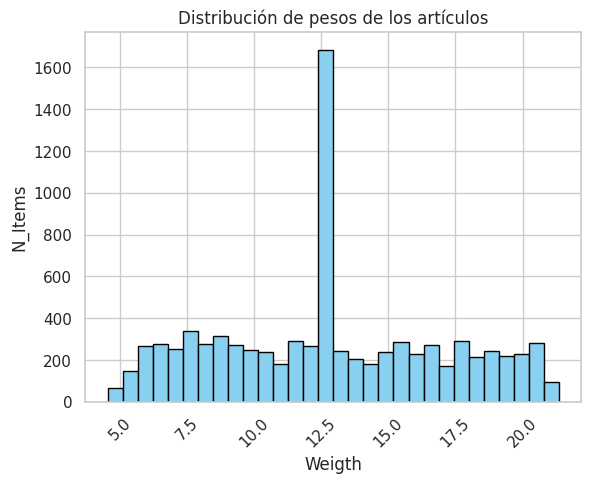

In [28]:
#Seaborn style
sns.set(style='whitegrid')

weight_filter = df.loc[:, 'Item_Weight'] <= 22.0 
df.loc[weight_filter, 'Item_Weight'].hist(bins = 30,
                                          color ='#89CFF0',
                                        edgecolor='black')

plt.xticks(rotation = 45)
plt.xlabel('Weigth')
plt.ylabel ('N_Items')
plt.title('Distribución de pesos de los artículos')
plt.ticklabel_format(useOffset=False, style='plain')

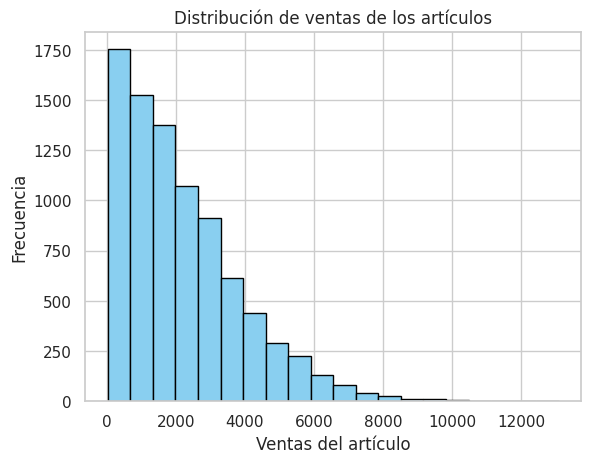

In [29]:
#Item Ventas
sns.set(style='whitegrid')

plt.hist(df['Item_Outlet_Sales'], bins=20, 
         color='#89CFF0', 
         edgecolor='black')

plt.xlabel('Ventas del artículo')
plt.ylabel('Frecuencia')
plt.title('Distribución de ventas de los artículos')
plt.show()


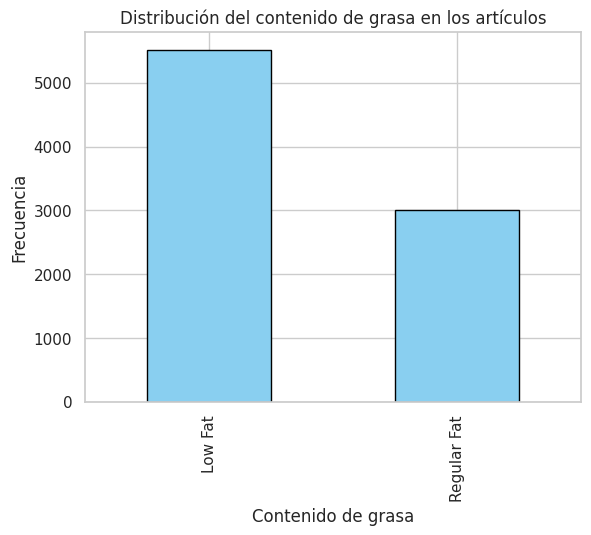

In [30]:
#Distribución de contenido de grasa en los items

sns.set(style='whitegrid')

item_fat_counts = df['Item_Fat_Content'].value_counts()
item_fat_counts.plot(kind='bar', 
                     color='#89CFF0', 
                     edgecolor='black')  


plt.xlabel('Contenido de grasa')
plt.ylabel('Frecuencia')
plt.title('Distribución del contenido de grasa en los artículos')
plt.show()

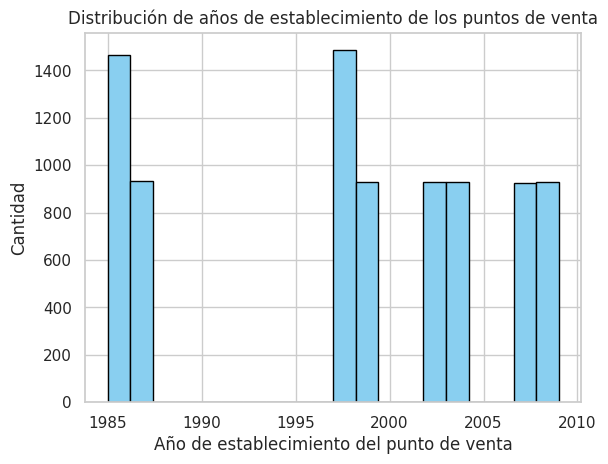

In [31]:
# Distribucuón años de creación puntos de venta
sns.set(style='whitegrid')

plt.hist(df['Outlet_Establishment_Year'], bins=20, color='#89CFF0', edgecolor='black')  # Amarillo pastel
plt.xlabel('Año de establecimiento del punto de venta')
plt.ylabel('Cantidad')
plt.title('Distribución de años de establecimiento de los puntos de venta')
plt.show()


2.Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

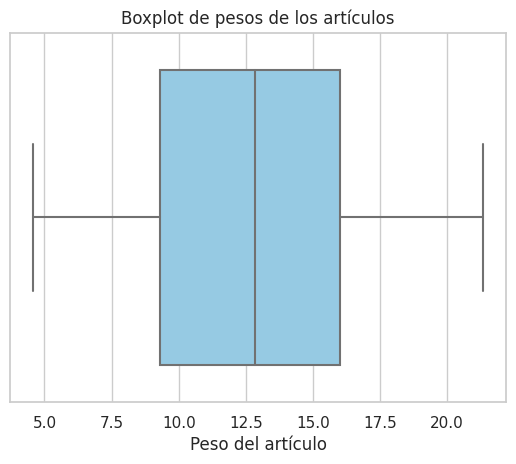

In [32]:
#Boxplot de pesos de los items

sns.boxplot(x=df['Item_Weight'], color='#89CFF0')
plt.xlabel('Peso del artículo')
plt.title('Boxplot de pesos de los artículos');

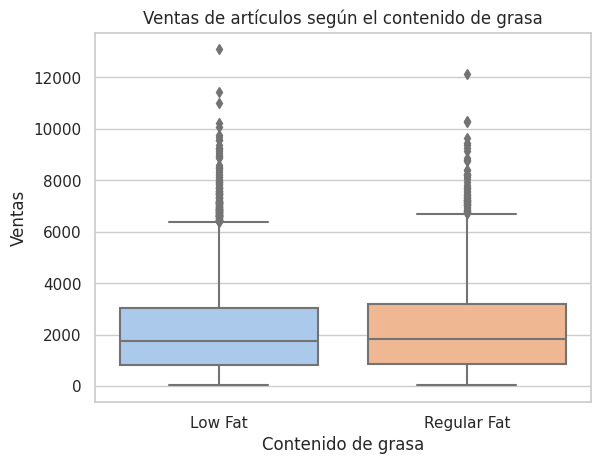

In [33]:
# Boxplot entre Ventas del artículos según su contenido de grasa

sns.boxplot(x=df['Item_Fat_Content'], y=df['Item_Outlet_Sales'], palette='pastel')

plt.xlabel('Contenido de grasa')
plt.ylabel('Ventas')
plt.title('Ventas de artículos según el contenido de grasa');


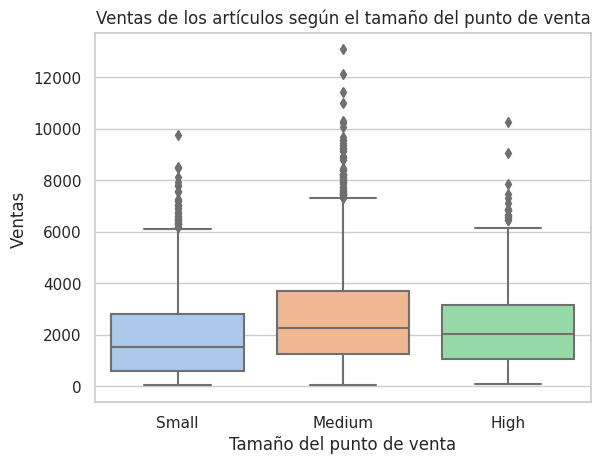

In [34]:
#Ventas de artículos según su punto de venta ( Small/Medium/High)

sns.boxplot(x=df['Outlet_Size'], y=df['Item_Outlet_Sales'], 
            palette='pastel', 
            order=['Small', 'Medium', 'High'])

plt.xlabel('Tamaño del punto de venta')
plt.ylabel('Ventas ')
plt.title('Ventas de los artículos según el tamaño del punto de venta');


3.Mapa de calor de la correlación entre las características.

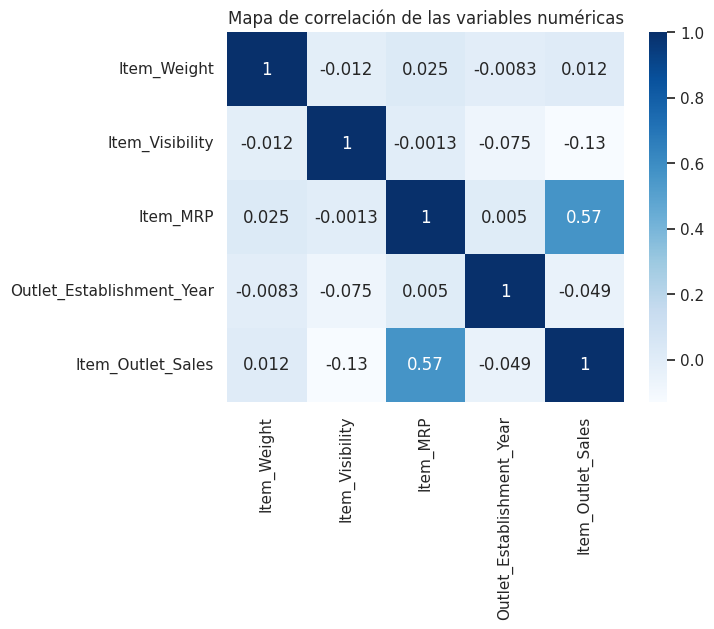

In [35]:
corr = df.corr() 

sns.heatmap(corr, cmap = 'Blues', annot = True) 

plt.title('Mapa de correlación de las variables numéricas');


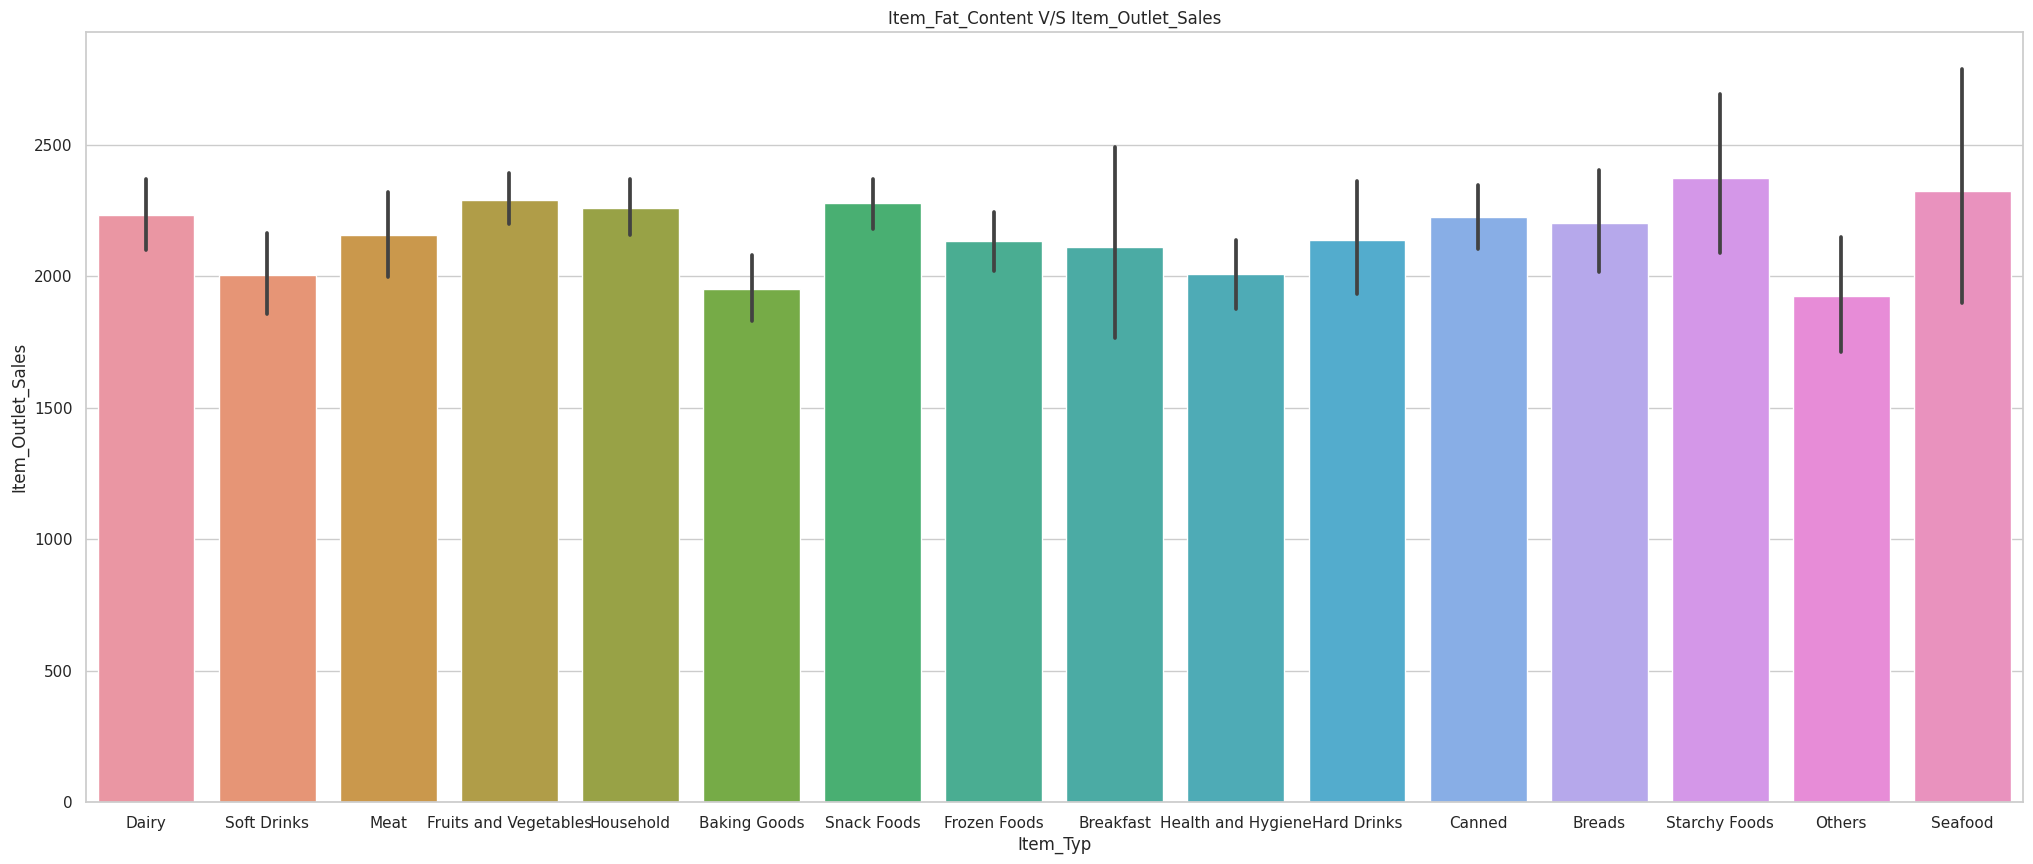

In [37]:
# Graficar Items_type según categoría
plt.figure(figsize=(25,10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data = df)

plt.title('Item_Fat_Content V/S Item_Outlet_Sales')
plt.xlabel('Item_Type')
plt.ylabel('Item_Outlet_Sales');